In [2]:
%load_ext autoreload
%autoreload 2

import analysis.ray_results_interpreter as rri
from importlib import reload
import pandas as pd

from ray.tune import ExperimentAnalysis
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sort_by = 'test_loss'
pick_row_from_run_by = 'dev_loss'
def custom_data_filler(out_row, reference_row):
    out_row['path'] = reference_row['path']

ctx_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx/3',
    # 5: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx/5',
    # 10: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx/10',
    # 20: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx/20',
    # 30: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx/30',
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx/50',
    1000: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx/1000',
}
gnn_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN/3',
    # 5: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN/5',
    # 10: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN/10',
    # 20: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN/20',
    # 30: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN/30',
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN/50',
    1000: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN/1000',
}
vanilla_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/vanilla/3',
    # 5: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/vanilla/5',
    # 10: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/vanilla/10',
    # 20: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/vanilla/20',
    # 30: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/vanilla/30',
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/vanilla/50',
    1000: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/vanilla/1000',
}
ctx_decentralized_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx_decentralized/3',
    # 5: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx_decentralized/5',
    # 10: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx_decentralized/10',
    # 20: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx_decentralized/20',
    # 30: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx_decentralized/30',
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx_decentralized/50',
    1000: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx_decentralized/1000',
}
transformed_nv_no_quantile_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/transformed_nv_no_quantile_one_warehouse/3',
    # 5: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/transformed_nv_no_quantile_one_warehouse/5',
    # 10: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/transformed_nv_no_quantile_one_warehouse/10',
    # 20: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/transformed_nv_no_quantile_one_warehouse/20',
    # 30: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/transformed_nv_no_quantile_one_warehouse/30',
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/transformed_nv_no_quantile_one_warehouse/50',
    1000: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/transformed_nv_no_quantile_one_warehouse/1000',
}
symmetry_aware_store_orders_for_warehouse_paths = {
    # 3: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/symmetry_aware_store_orders_for_warehouse/3',
    # 50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/symmetry_aware_store_orders_for_warehouse/50',
    1000: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/symmetry_aware_store_orders_for_warehouse/1000',
}
symmetry_aware_store_orders_for_warehouse_GNN_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/symmetry_aware_store_orders_for_warehouse_GNN/3',
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/symmetry_aware_store_orders_for_warehouse_GNN/50',
    1000: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/symmetry_aware_store_orders_for_warehouse_GNN/1000',
}
symmetry_aware_store_orders_for_warehouse_decentralized_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/symmetry_aware_store_orders_for_warehouse_decentralized/3',
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/symmetry_aware_store_orders_for_warehouse_decentralized/50',
    1000: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/symmetry_aware_store_orders_for_warehouse_decentralized/1000',
}

#training_n_samples = [1, 2, 4, 8, 16, 256, 8192]
training_n_samples = [1, 8, 16, 8192]
results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_ctx.rename(columns={'context': 'context size'}, inplace=True)

df_gnn = results_interpretor.make_table(gnn_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_gnn.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_vanilla = results_interpretor.make_table(vanilla_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)

# df_ctx_decentralized = results_interpretor.make_table(ctx_decentralized_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
# df_ctx_decentralized.rename(columns={'context': 'context size'}, inplace=True)

df_transformed_nv_no_quantile = results_interpretor.make_table(transformed_nv_no_quantile_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)

df_symmetry_aware_store_orders_for_warehouse = results_interpretor.make_table(symmetry_aware_store_orders_for_warehouse_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'n_sub_sample_for_context': [100, 300, 500, 1000]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_symmetry_aware_store_orders_for_warehouse.rename(columns={'context': 'context size'}, inplace=True)

df_symmetry_aware_store_orders_for_warehouse_GNN = results_interpretor.make_table(symmetry_aware_store_orders_for_warehouse_GNN_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_symmetry_aware_store_orders_for_warehouse_GNN.rename(columns={'context': 'context size'}, inplace=True)

df_symmetry_aware_store_orders_for_warehouse_decentralized = results_interpretor.make_table(symmetry_aware_store_orders_for_warehouse_decentralized_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)

df_ctx.insert(1, 'Architecture Class', "Symmetry_Aware")
df_gnn.insert(1, 'Architecture Class', "GNN")
df_vanilla.insert(1, 'Architecture Class', "Vanilla")
df_transformed_nv_no_quantile.insert(1, 'Architecture Class', "Benchmark")
df_symmetry_aware_store_orders_for_warehouse.insert(1, 'Architecture Class', "Symmetry_Aware_SOW")
df_symmetry_aware_store_orders_for_warehouse_GNN.insert(1, 'Architecture Class', "Symmetry_Aware_SOW_GNN")
df_symmetry_aware_store_orders_for_warehouse_decentralized.insert(1, 'Architecture Class', "Symmetry_Aware_SOW_Decentralized")

df = pd.concat([df_ctx, df_gnn, df_vanilla, df_transformed_nv_no_quantile, df_symmetry_aware_store_orders_for_warehouse, df_symmetry_aware_store_orders_for_warehouse_GNN, df_symmetry_aware_store_orders_for_warehouse_decentralized])

df.drop(columns=['samples'], inplace=True)

min_test_loss = df.groupby(['# of stores'])['Test Loss'].transform('min')
df['Test Gap %'] = (df['Test Loss']/ min_test_loss) * 100

df_avg = df.groupby(['# of stores', 'Architecture Class', 'training_n_samples']).agg({
    'Train Loss': 'mean',
    'Dev Loss': 'mean',
    'Test Loss': 'mean',
    'Test Gap %': ['mean', 'std'],
    '# of runs': 'sum'
}).reset_index()

# Flatten column names
df_avg.columns = ['_'.join(col).strip() for col in df_avg.columns.values]

# Rename columns for clarity
df_avg.rename(columns={
    '# of stores_': '# of stores',
    'Architecture Class_': 'Architecture Class',
    'training_n_samples_': 'training_n_samples',
    'Train Loss_mean': 'Train Loss',
    'Dev Loss_mean': 'Dev Loss',
    'Test Loss_mean': 'Test Loss',
    'Test Gap %_mean': 'Test Gap %',
    'Test Gap %_std': 'Test Gap % Std',
    '# of runs_sum': '# of runs'
}, inplace=True)

df_avg = df_avg[['# of stores', 'Architecture Class', 'training_n_samples', 'Train Loss', 'Dev Loss', 'Test Loss', 'Test Gap %', 'Test Gap % Std', '# of runs']]
df = df_avg

df.sort_values(by=['# of stores', 'training_n_samples'], inplace=True)
print(df.to_string(index=False))

Error, NaN values found in loss columns /user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx/1000/run_2024-10-17_22-54-28/run_4ad10_00000_0_context=256,learning_rate=0.0100,repeats=1,samples=1,training_n_samples=1_2024-10-17_22-54-29: 
 # of stores               Architecture Class  training_n_samples  Train Loss  Dev Loss  Test Loss  Test Gap %  Test Gap % Std  # of runs
           3                        Benchmark                   1   11.095923 11.133745  11.676770  208.217264      141.614662         69
           3                              GNN                   1    4.902669  6.346490   6.654475  118.660941       11.728801        108
           3                   Symmetry_Aware                   1    5.136106  6.414436   6.578398  117.304357        9.670753        108
           3                              GNN                   8    5.540118  5.848575   5.853717  104.382033        1.460923        108
           3                   Symmetry_Aware                   8    5.5

In [3]:
sort_by = 'test_loss'
pick_row_from_run_by = 'dev_loss'
def custom_data_filler(out_row, reference_row):
    out_row['path'] = reference_row['path']

ctx_storeorders_paths = {
    1000: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/symmetry_aware_store_orders_for_warehouse/1000',
}
training_n_samples = [1, 2, 4, 8, 16, 256, 8192]
results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_storeorders_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'n_sub_sample_for_context': [100, 300, 500, 1000]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_ctx.rename(columns={'samples': 'sample_idx'}, inplace=True)

# Group by sample_idx, training_n_samples, n_sub_sample_for_context and calculate mean and std of Train Loss, Dev Loss, and Test Loss
grouped_df = df_ctx.groupby(['training_n_samples', 'n_sub_sample_for_context']).agg({
    'Train Loss': 'mean',
    'Dev Loss': 'mean',
    'Test Loss': ['mean', 'std']
}).reset_index()

# Flatten column names
grouped_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped_df.columns.values]

# Rename columns for clarity
grouped_df.rename(columns={
    'Train Loss': 'Train Loss Mean',
    'Dev Loss': 'Dev Loss Mean',
    'Test Loss_mean': 'Test Loss Mean',
    'Test Loss_std': 'Test Loss Std'
}, inplace=True)

print(grouped_df.to_string(index=False))

 training_n_samples  n_sub_sample_for_context  Train Loss_mean  Dev Loss_mean  Test Loss Mean  Test Loss Std
                  1                       100         5.874211       6.233294        6.232263       0.310584
                  1                       300         5.423687       6.381614        6.251251       0.318923
                  1                       500         5.384125       6.124627        6.109772       0.100986
                  1                      1000         5.308417       6.171794        6.223210       0.255304
                  8                       100         5.586377       5.774384        5.805697       0.105104
                  8                       300         5.599420       5.759963        5.791097       0.069485
                  8                       500         5.589274       5.758798        5.803225       0.101577
                  8                      1000         5.541240       5.766308        5.808873       0.094895


In [1]:
sort_by = 'test_loss'
pick_row_from_run_by = 'dev_loss'
def custom_data_filler(out_row, reference_row):
    pass

ctx_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx/50',
}
ctx_decentralized_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/ctx_decentralized/50',
}
gnn_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN/50',
}
vanilla_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/vanilla/50',
}
gnn_attention_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN_attention/50',
}
gnn_pna_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN_PNA/50',
}
gnn_mp_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN_message_passing/50',
}
gnn_wistemb_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN_WISTEMB/50',
}
gnn_large_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN_large/50',
}
gnn_no_aggregation_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN_No_Aggregation/50',
}
gnn_no_aggregation_randomize_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/sample_efficiency/GNN_No_Aggregation_Randomize/50',
}

training_n_samples = [1, 2, 4, 8, 16, 256, 8192]
results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_ctx.rename(columns={'context': 'context size'}, inplace=True)

df_ctx_decentralized = results_interpretor.make_table(ctx_decentralized_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_ctx_decentralized.rename(columns={'context': 'context size'}, inplace=True)

df_gnn = results_interpretor.make_table(gnn_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_gnn.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_vanilla = results_interpretor.make_table(vanilla_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)

df_gnn_attention = results_interpretor.make_table(gnn_attention_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_gnn_attention.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_pna = results_interpretor.make_table(gnn_pna_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_gnn_pna.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_mp = results_interpretor.make_table(gnn_mp_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_gnn_mp.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_wistemb = results_interpretor.make_table(gnn_wistemb_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_gnn_wistemb.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_large = results_interpretor.make_table(gnn_large_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_gnn_large.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_no_aggregation = results_interpretor.make_table(gnn_no_aggregation_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_gnn_no_aggregation.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_no_aggregation_randomize = results_interpretor.make_table(gnn_no_aggregation_randomize_paths, {'training_n_samples': training_n_samples, 'samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_gnn_no_aggregation_randomize.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_ctx.insert(1, 'Architecture Class', "Symmatry_Aware")
df_ctx_decentralized.insert(1, 'Architecture Class', "Symmatry_Aware_Decentralized")
df_gnn.insert(1, 'Architecture Class', "GNN")
df_vanilla.insert(1, 'Architecture Class', "Vanilla")
df_gnn_attention.insert(1, 'Architecture Class', "GNN_Attention")
df_gnn_pna.insert(1, 'Architecture Class', "GNN_PNA")
df_gnn_mp.insert(1, 'Architecture Class', "GNN_MP")
df_gnn_wistemb.insert(1, 'Architecture Class', "GNN_WISTEMB")
df_gnn_large.insert(1, 'Architecture Class', "GNN_Large")
df_gnn_no_aggregation.insert(1, 'Architecture Class', "GNN_No_Aggregation")
df_gnn_no_aggregation_randomize.insert(1, 'Architecture Class', "GNN_No_Aggregation_Randomize")

df = pd.concat([df_ctx, df_ctx_decentralized, df_gnn, df_gnn_pna, df_gnn_attention, df_gnn_mp, df_gnn_wistemb
                , df_gnn_large, df_gnn_no_aggregation, df_gnn_no_aggregation_randomize, df_vanilla])

df.drop(columns=['Learning Rate', 'samples'], inplace=True)

min_test_loss = 5.36
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100

df_avg = df.groupby(['# of stores', 'Architecture Class', 'training_n_samples']).agg({
    'Train Loss': 'mean',
    'Dev Loss': 'mean',
    'Test Loss': 'mean',
    'Test Gap %': ['mean', 'std'],
    '# of runs': 'sum'
}).reset_index()

# Flatten column names
df_avg.columns = ['_'.join(col).strip() for col in df_avg.columns.values]

# Rename columns for clarity
df_avg.rename(columns={
    '# of stores_': '# of stores',
    'Architecture Class_': 'Architecture Class',
    'training_n_samples_': 'training_n_samples',
    'Train Loss_mean': 'Train Loss',
    'Dev Loss_mean': 'Dev Loss',
    'Test Loss_mean': 'Test Loss',
    'Test Gap %_mean': 'Test Gap %',
    'Test Gap %_std': 'Test Gap % Std',
    '# of runs_sum': '# of runs'
}, inplace=True)

df_avg = df_avg[['# of stores', 'Architecture Class', 'training_n_samples', 'Train Loss', 'Dev Loss', 'Test Loss', 'Test Gap %', 'Test Gap % Std', '# of runs']]
df = df_avg

df.sort_values(by=['# of stores', 'training_n_samples'], inplace=True)
print(df.to_string(index=False))

NameError: name 'rri' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot style
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Define colors for different training_n_samples
colors = {8192: 'blue', 256: 'green', 16: 'red'}

# Define line styles for different architecture classes
line_styles = {'Symmatry_Aware': '-', 'GNN': '--', 'Vanilla': ':'}

# Define markers for different training_n_samples
markers = {8192: 'o', 256: 's', 16: '^'}

# Plot lines for each architecture and training_n_samples combination in the first subplot
for arch in df['Architecture Class'].unique():
    for n_samples in [8192, 256, 16]:
        data = df[(df['Architecture Class'] == arch) & (df['training_n_samples'] == n_samples)]
        ax1.plot(data['# of stores'], data['Test Gap %'], 
                 color=colors[n_samples],
                 linestyle=line_styles[arch],
                 marker=markers[n_samples],
                 label=f'{arch}, {n_samples} samples')

# Customize the first subplot
ax1.set_xlabel('Number of Stores', fontsize=12)
ax1.set_ylabel('Cost Relative to Best Run (%)', fontsize=12)
ax1.set_title('Performance Comparison (8192, 256, 16 samples)', fontsize=14)
ax1.set_xticks([10, 20, 30, 40, 50])
ax1.set_xticklabels(['10', '20', '30', '40', '50'])
ax1.grid(True, which="both", ls="-", alpha=0.2)
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
for spine in ax1.spines.values():
    spine.set_linewidth(1.5)

# Define new colors, line styles, and markers for the second subplot
colors_2 = {1: '#1f77b4', 2: '#ff7f0e', 4: '#2ca02c', 8: '#d62728'}
markers_2 = {1: 'o', 2: 's', 4: '^', 8: 'D'}

# Plot lines for each architecture and training_n_samples combination in the second subplot
for arch in ['Symmatry_Aware', 'GNN']:  # Removed 'Vanilla'
    for n_samples in [1, 2, 4, 8]:
        data = df[(df['Architecture Class'] == arch) & (df['training_n_samples'] == n_samples)]
        mean = data['Test Gap %']
        std = data['Test Gap % Std']
        x = data['# of stores']
        
        # Plot the mean line
        ax2.plot(x, mean, 
                 color=colors_2[n_samples],
                 linestyle=line_styles[arch],
                 marker=markers_2[n_samples],
                 label=f'{arch}, {n_samples} samples')
        
        # # Plot the 95% confidence interval
        # ax2.fill_between(x, mean - 1.96*std/np.sqrt(12), mean + 1.96*std/np.sqrt(12), 
        #                  color=colors_2[n_samples], alpha=0.2)

# Customize the second subplot
ax2.set_xlabel('Number of Stores', fontsize=12)
ax2.set_ylabel('Cost Relative to Best Run (%)', fontsize=12)
ax2.set_title('Performance Comparison (1, 2, 4, 8 samples)', fontsize=14)
ax2.set_xticks([10, 20, 30, 40, 50, 200])
ax2.set_xticklabels(['10', '20', '30', '40', '50', '200'])
ax2.grid(True, which="both", ls="-", alpha=0.2)
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)

# Create custom legend for first subplot
legend_elements_1 = []

# Add marker legend for first subplot (8192, 256, 16 samples)
for n_samples, marker in markers.items():
    legend_elements_1.append(plt.Line2D([0], [0], marker=marker, color=colors[n_samples], linestyle='None', markersize=8, label=f'{n_samples} samples'))

# Add line style legend for first subplot (all architecture types)
for arch, style in line_styles.items():
    legend_elements_1.append(plt.Line2D([0], [0], color='gray', linestyle=style, lw=2, label=arch))

# Add the legend to the first subplot
ax1.legend(handles=legend_elements_1, loc='upper left', fontsize=8)

# Create custom legend for second subplot
legend_elements_2 = []

# Add marker legend for second subplot (1, 2, 4, 8 samples)
for n_samples, marker in markers_2.items():
    legend_elements_2.append(plt.Line2D([0], [0], marker=marker, color=colors_2[n_samples], linestyle='None', markersize=8, label=f'{n_samples} samples'))

# Add line style legend for second subplot (only Symmatry_Aware and GNN)
for arch, style in {k: v for k, v in line_styles.items() if k != 'Vanilla'}.items():
    legend_elements_2.append(plt.Line2D([0], [0], color='gray', linestyle=style, lw=2, label=arch))

# Add the legend to the second subplot
ax2.legend(handles=legend_elements_2, loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

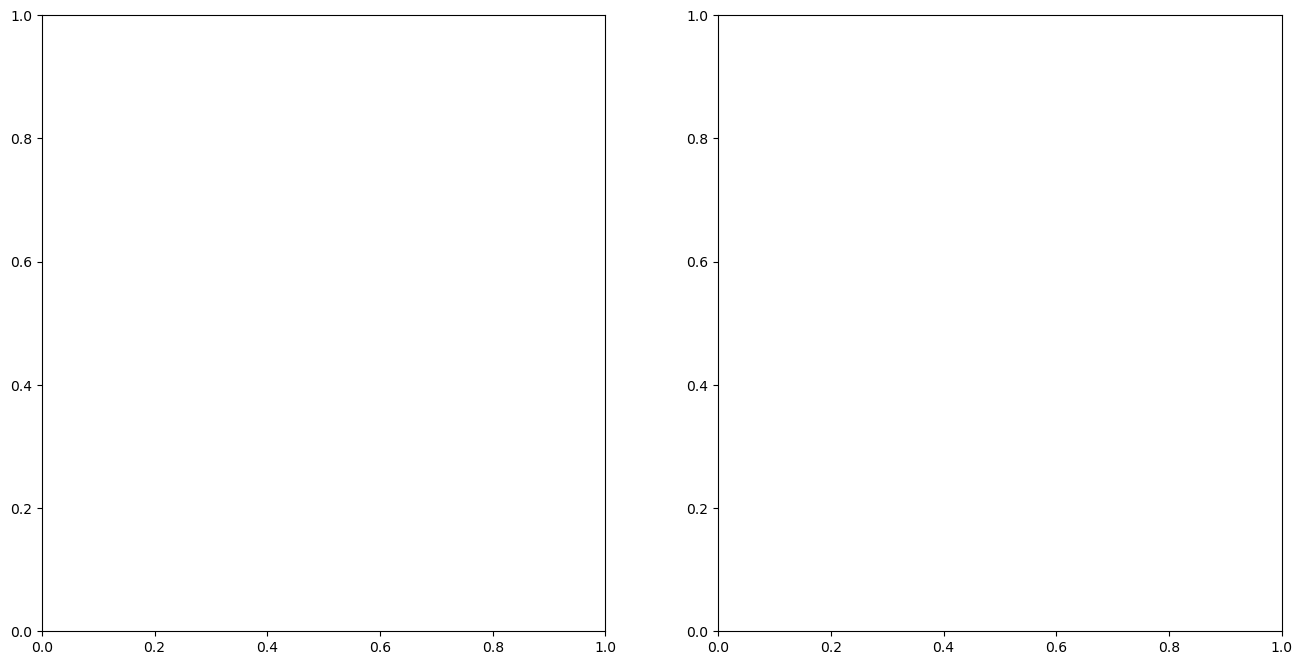

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot style
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Define colors for different training_n_samples
colors_2 = {1: '#1f77b4', 2: '#ff7f0e', 4: '#2ca02c', 8: '#d62728'}

# Define line styles for different architecture classes
line_styles = {'Symmatry_Aware': '-', 'GNN': '--'}

# Define markers for different training_n_samples
markers_2 = {1: 'o', 2: 's', 4: '^', 8: 'D'}

# Plot lines for Symmatry_Aware in the first subplot
for n_samples in [1, 2, 4, 8]:
    data = df[(df['Architecture Class'] == 'Symmatry_Aware') & (df['training_n_samples'] == n_samples)]
    mean = data['Test Gap %']
    std = data['Test Gap % Std']
    x = data['# of stores']
    
    # Plot the mean line
    ax1.plot(x, mean, 
             color=colors_2[n_samples],
             linestyle=line_styles['Symmatry_Aware'],
             marker=markers_2[n_samples],
             label=f'{n_samples} samples')
    
    # Plot the 95% confidence interval
    ax1.fill_between(x, mean - 1.96*std/np.sqrt(12), mean + 1.96*std/np.sqrt(12), 
                     color=colors_2[n_samples], alpha=0.2)

# Plot lines for GNN in the second subplot
for n_samples in [1, 2, 4, 8]:
    data = df[(df['Architecture Class'] == 'GNN') & (df['training_n_samples'] == n_samples)]
    mean = data['Test Gap %']
    std = data['Test Gap % Std']
    x = data['# of stores']
    
    # Plot the mean line
    ax2.plot(x, mean, 
             color=colors_2[n_samples],
             linestyle=line_styles['GNN'],
             marker=markers_2[n_samples],
             label=f'{n_samples} samples')
    
    # Plot the 95% confidence interval
    ax2.fill_between(x, mean - 1.96*std/np.sqrt(12), mean + 1.96*std/np.sqrt(12), 
                     color=colors_2[n_samples], alpha=0.2)

# Customize the first subplot (Symmatry_Aware)
ax1.set_xlabel('Number of Stores', fontsize=12)
ax1.set_ylabel('Cost Relative to Best Run (%)', fontsize=12)
ax1.set_title('Symmatry_Aware Performance (1, 2, 4, 8 samples)', fontsize=14)
ax1.set_xticks([10, 20, 30, 40, 50])
ax1.set_xticklabels(['10', '20', '30', '40', '50'])
ax1.grid(True, which="both", ls="-", alpha=0.2)
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
for spine in ax1.spines.values():
    spine.set_linewidth(1.5)

# Customize the second subplot (GNN)
ax2.set_xlabel('Number of Stores', fontsize=12)
ax2.set_ylabel('Cost Relative to Best Run (%)', fontsize=12)
ax2.set_title('GNN Performance (1, 2, 4, 8 samples)', fontsize=14)
ax2.set_xticks([10, 20, 30, 40, 50])
ax2.set_xticklabels(['10', '20', '30', '40', '50'])
ax2.grid(True, which="both", ls="-", alpha=0.2)
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)

# Create custom legend
legend_elements = []

# Add marker legend for samples
for n_samples, marker in markers_2.items():
    legend_elements.append(plt.Line2D([0], [0], marker=marker, color=colors_2[n_samples], linestyle='None', markersize=8, label=f'{n_samples} samples'))

# Add the legend to both subplots
ax1.legend(handles=legend_elements, loc='upper left', fontsize=8)
ax2.legend(handles=legend_elements, loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

In [48]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/user/ml4723/Prj/NIC/Input/favorita-grocery-sales-forecasting/items.csv')

# Count non-perishable items
non_perishable_count = df[df['perishable'] == 0].shape[0]

print(f"The file 'items.csv' has {non_perishable_count} non-perishable items.")

The file 'items.csv' has 3114 non-perishable items.
